In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import sklearn
import math
import joblib
from matplotlib import pyplot as plt

In [3]:
# Load the npz file
train_1 = np.load("data/train_data.npy")
train_2 = np.load("data/train_labels.npy")
train_df = DataFrame(train_1)
del train_1
train_lb_df = DataFrame(train_2)
del train_2

# For validation
val_1 = np.load("data/eval_data.npy")
val_2 = np.load("data/eval_labels.npy")
val_df = DataFrame(val_1)
del val_1
val_lb_df = DataFrame(val_2)
del val_2

In [4]:
print(val_lb_df.iloc[:,0].unique())

[1 0 2]


In [5]:
print(train_lb_df.iloc[:,0].unique()) #[1, 0, 2]
# Draw some plots to simply see the characteristics of training data
def DrawDist( ser_ft, ser_lb, ps="" ):
    ft_name = str(ser_ft.name)
    fig = plt.figure(figsize=(4,5), dpi=70)
    plt.hist(ser_ft[ser_lb==0], color='red', cumulative=False, 
             alpha=0.3,histtype='step', density=True)
    plt.hist(ser_ft[ser_lb==1], color='blue', cumulative=False, 
             alpha=0.3,histtype='step', density=True)
    plt.hist(ser_ft[ser_lb==2], color='grey', cumulative=False, 
             alpha=0.3,histtype='step', density=True)
    plt.show()
    fig.savefig("Fig/" + ft_name + ps + "_label.png")

#for ft in train_df.columns:
#   DrawDist( train_df[ft], train_lb_df.iloc[:,0] )
print(type(train_lb_df))
#train_lb_df = pd.Series(train_lb_df.iloc[:,0])
# Check if the classes are imbalance
no_0 = len(train_lb_df[train_lb_df==0])
no_1 = len(train_lb_df[train_lb_df==1])
no_2 = len(train_lb_df[train_lb_df==2])
print("class 0 : ", no_0/(no_0+no_1+no_2))
print("class 1 : ", no_1/(no_0+no_1+no_2))
print("class 2 : ", no_2/(no_0+no_1+no_2))

[1 0 2]
<class 'pandas.core.frame.DataFrame'>
class 0 :  0.3333333333333333
class 1 :  0.3333333333333333
class 2 :  0.3333333333333333


In [6]:
for ft in train_df.columns:
    ft_uni_list = train_df[ft].unique()
    if len(ft_uni_list) < 100: #if len(ft_uni_list) < 10:
        print("feature:" + str(ft) + ", categories #:" + str(len(ft_uni_list)), ft_uni_list )
# deal with the categories feature => they have been already one-hot
print(type(train_df.columns[2]))

feature:56, categories #:2 [0. 1.]
feature:57, categories #:2 [0. 1.]
feature:58, categories #:2 [0. 1.]
feature:59, categories #:2 [0. 1.]
feature:60, categories #:2 [0. 1.]
<class 'int'>


In [16]:
def DrawLDA(f_train, train_lb, points=3000):
    
    #print(f_train.iloc[ (train_lb_df.iloc[:100,0]==i).tolist(),0])
    color_list = ['royalblue', 'orange', 'darkcyan']
    fig = plt.figure(figsize=(6,6), dpi=80)
    for i in range(1,3):
        plt.scatter(f_train[:points,0][(train_lb.iloc[:points,0]==i).tolist()],
                    f_train[:points,1][(train_lb.iloc[:points,0]==i).tolist()],
                    s=50, marker='$'+str(i)+'$', alpha=0.5, c=color_list[i])
    plt.show()
    fig = plt.figure(figsize=(6,6), dpi=80)
    for i in range(0,3):
        plt.scatter(f_train[:points,0][(train_lb.iloc[:points,0]==i).tolist()],
                    f_train[:points,1][(train_lb.iloc[:points,0]==i).tolist()],
                    s=50, marker='$'+str(i)+'$', alpha=0.5, c=color_list[i])
    plt.show()
    fig = plt.figure(figsize=(6,6), dpi=80)
    plt.scatter(f_train[:points,0][(train_lb.iloc[:points,0]==0).tolist()],
                f_train[:points,1][(train_lb.iloc[:points,0]==0).tolist()],
                s=50, marker='$'+str(0)+'$', alpha=0.5, c=color_list[0])
    plt.show()

In [13]:
# pre-train LDA
#continuous_list = [x for x in train_df.columns if x not in range(56,61)]
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(n_components=2)
f_train = LDA.fit_transform(train_df, train_lb_df[0])

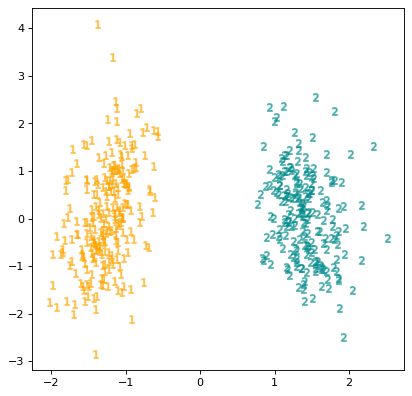

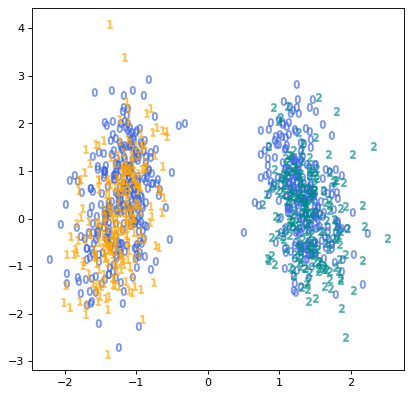

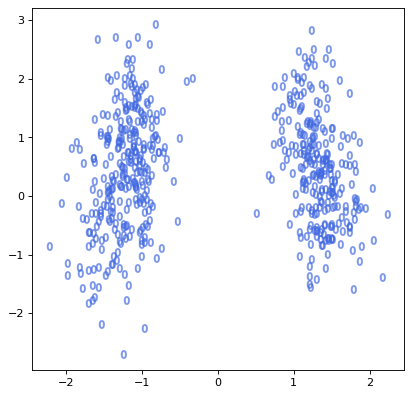

In [17]:
DrawLDA(f_train, train_lb_df, 1000)

In [47]:
# For classify 1 and 2
from sklearn.model_selection import cross_val_score
LDA_12 = LinearDiscriminantAnalysis(n_components=1)
scores = cross_val_score(LDA_12, train_df.loc[(train_lb_df[0]==1)|(train_lb_df[0]==2), continuous_list],
                         train_lb_df.loc[(train_lb_df[0]==1)|(train_lb_df[0]==2),0], scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.994 +/- 0.003


In [72]:
# For classify 1 and 2, add the noncontinuous elements in
from sklearn.model_selection import cross_val_score
LDA_12_all = LinearDiscriminantAnalysis(n_components=1)
scores_12_all = cross_val_score(LDA_12_all, train_df.loc[(train_lb_df[0]==1)|(train_lb_df[0]==2),:],
                         train_lb_df.loc[(train_lb_df[0]==1)|(train_lb_df[0]==2),0], scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_12_all), np.std(scores_12_all)))

CV accuracy: 0.994 +/- 0.003


c:\users\snail\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


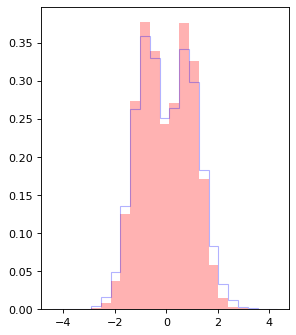

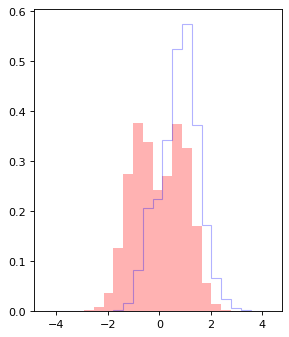

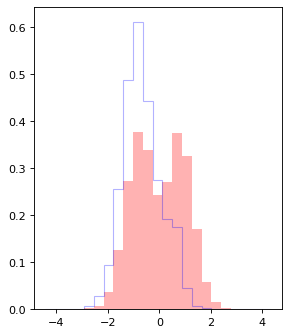

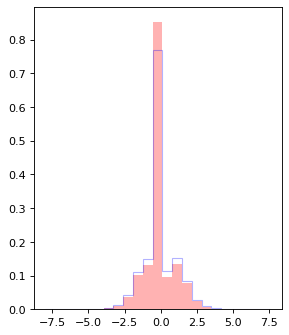

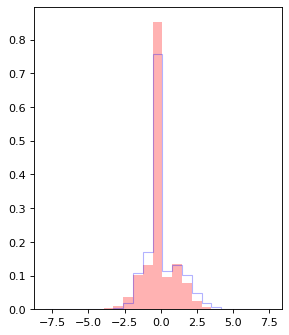

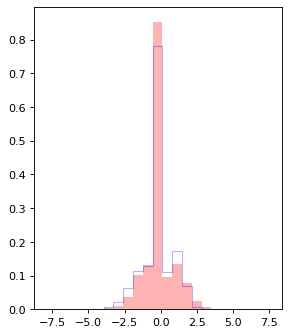

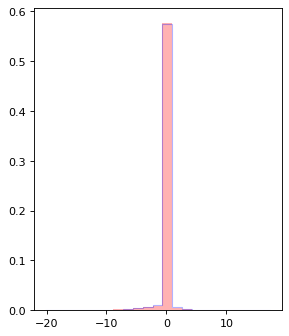

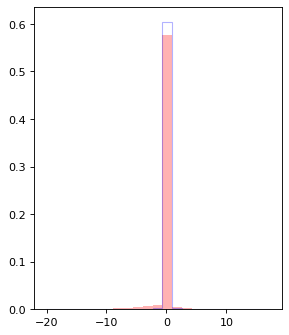

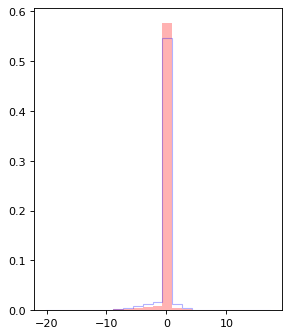

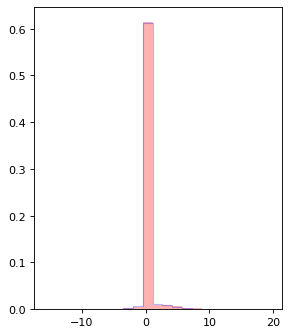

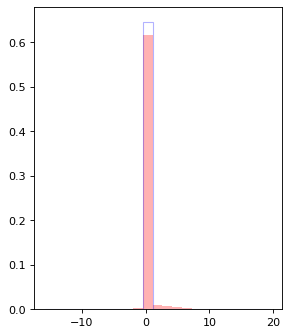

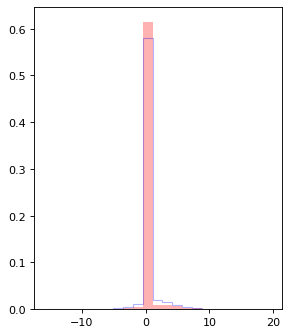

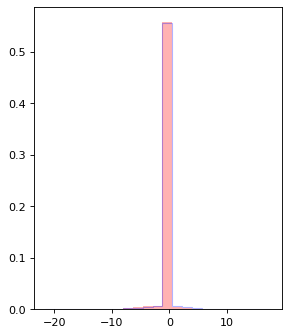

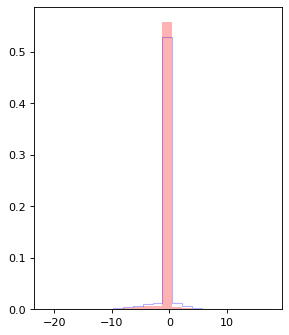

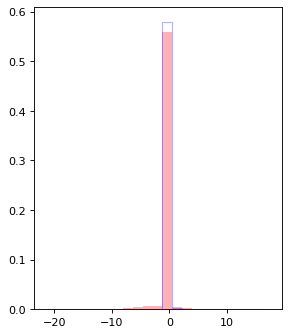

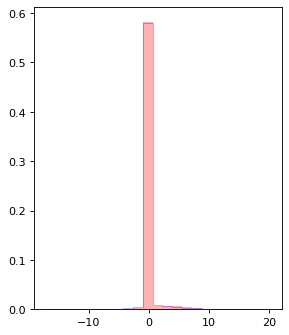

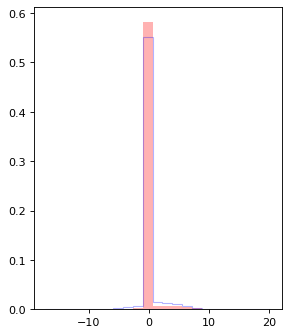

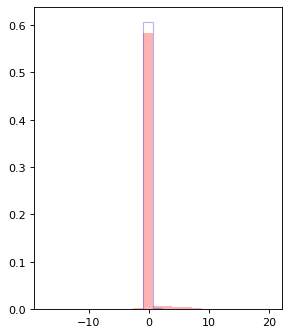

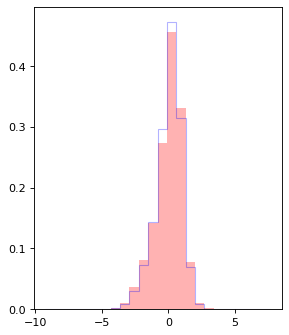

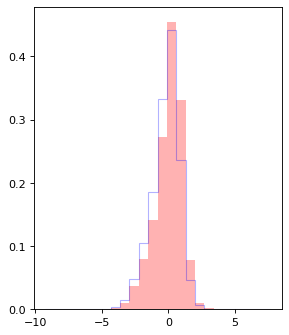

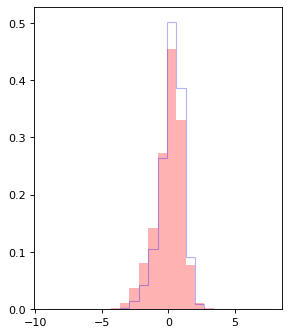

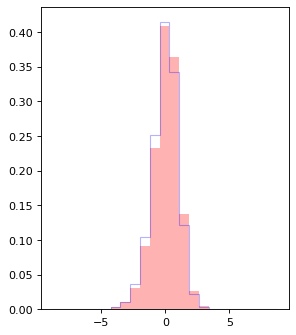

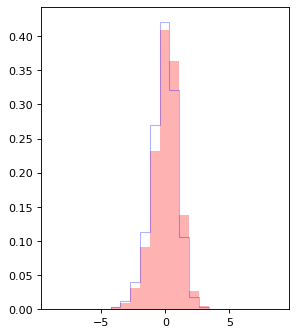

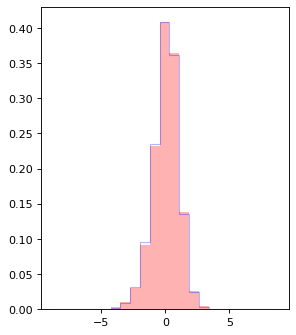

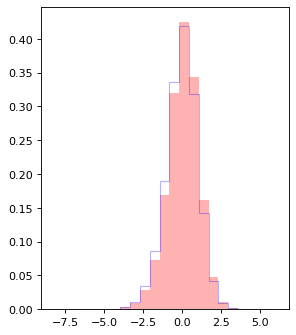

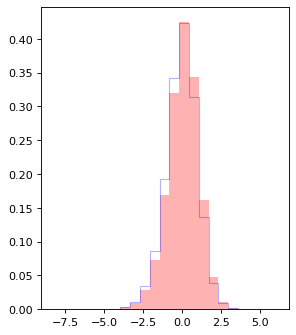

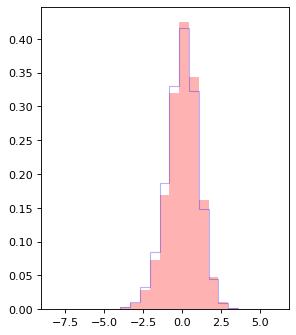

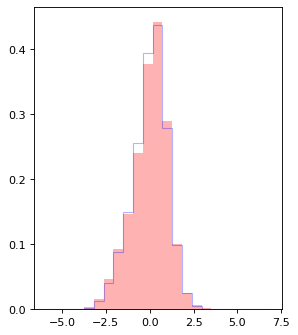

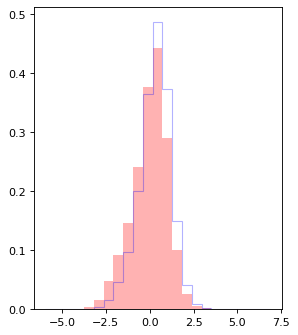

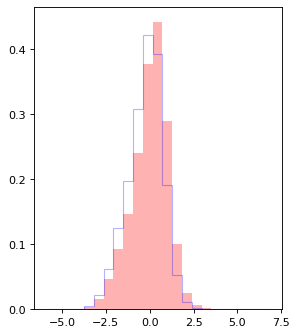

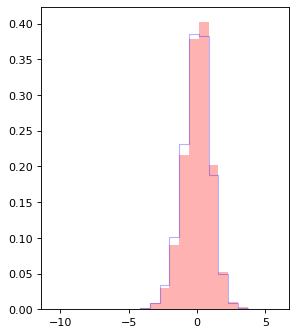

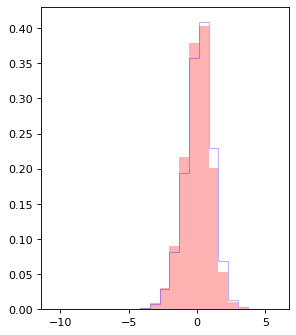

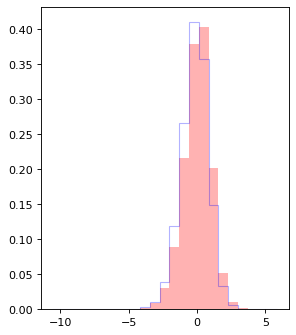

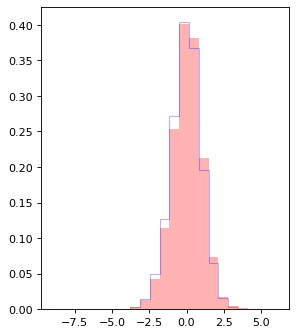

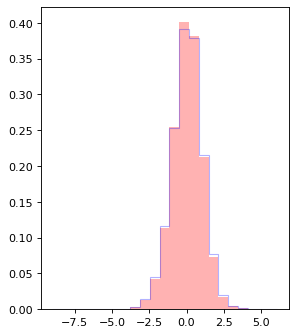

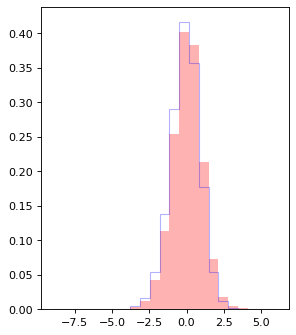

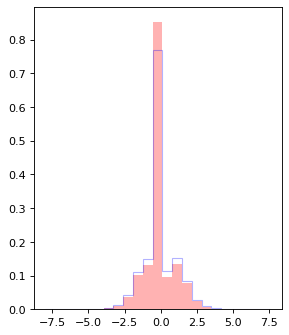

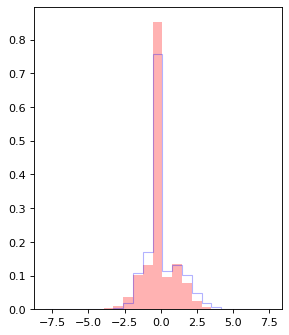

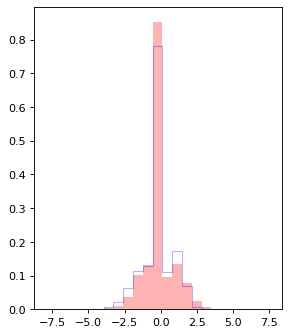

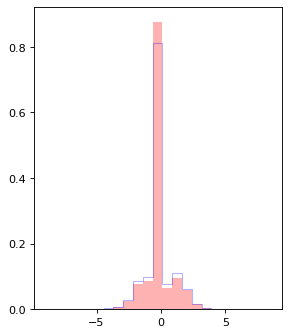

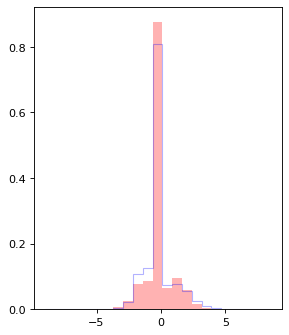

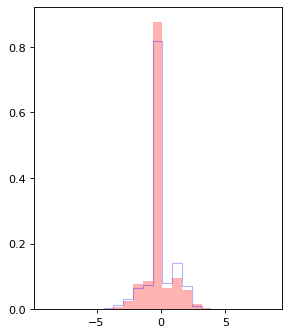

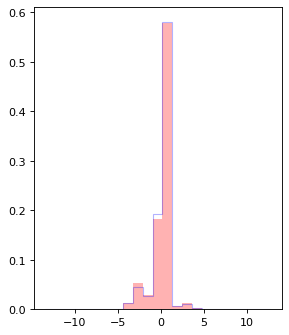

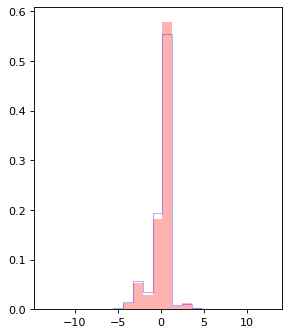

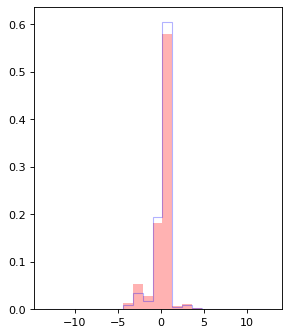

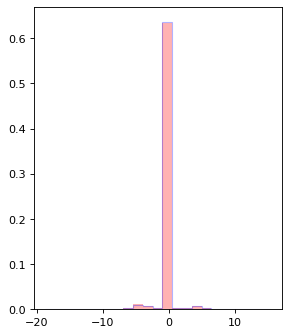

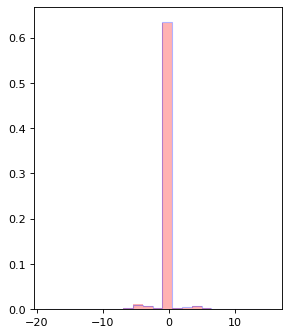

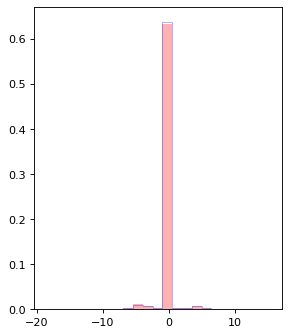

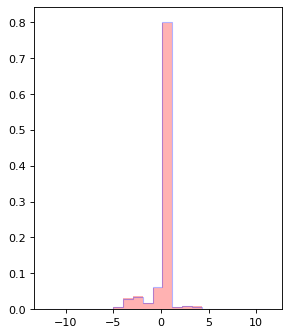

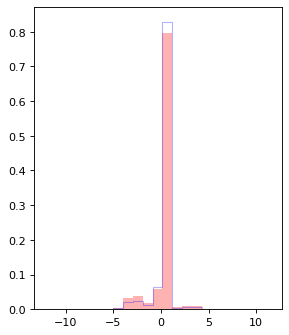

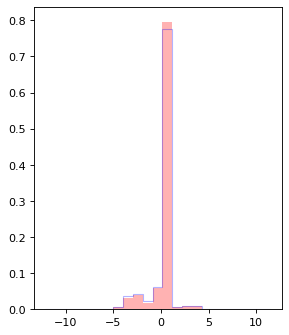

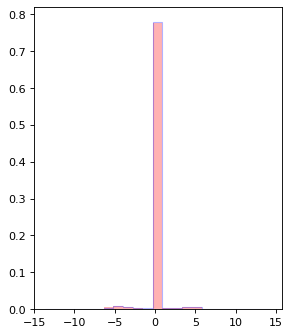

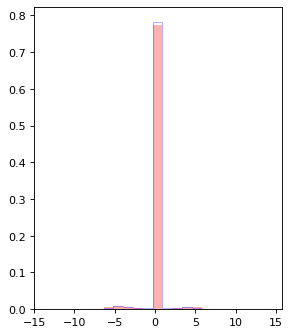

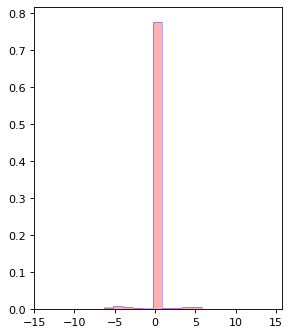

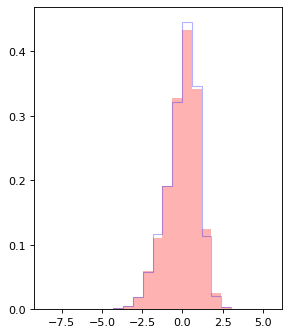

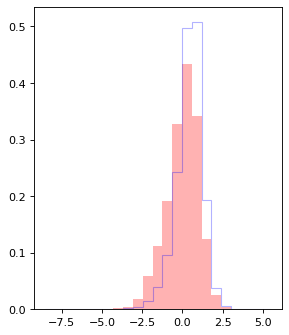

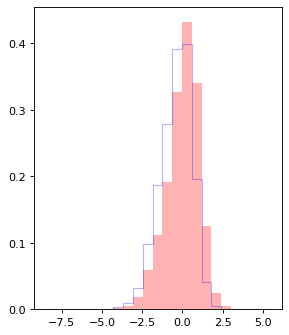

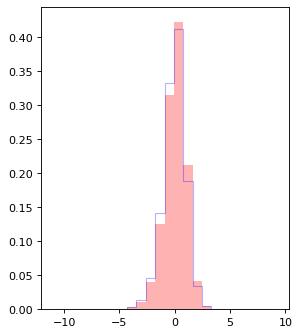

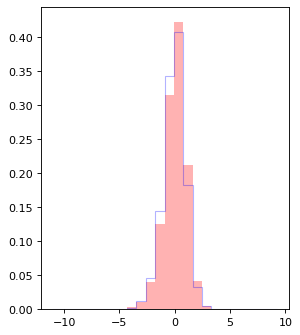

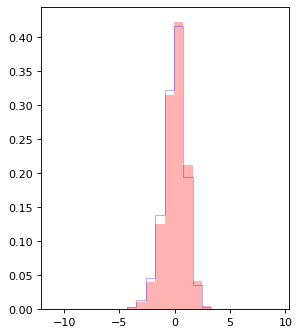

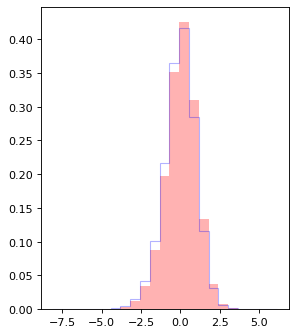

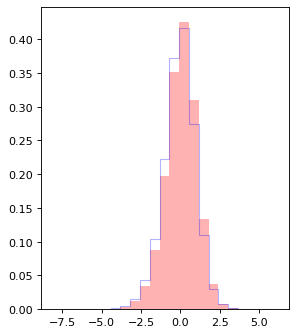

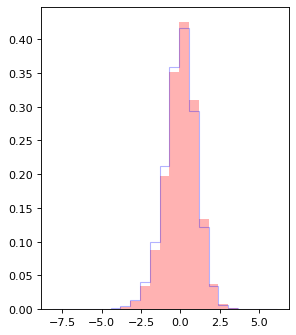

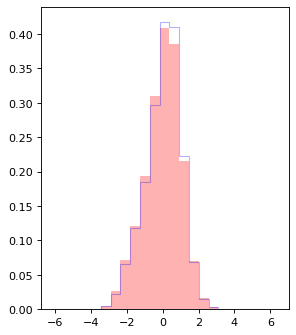

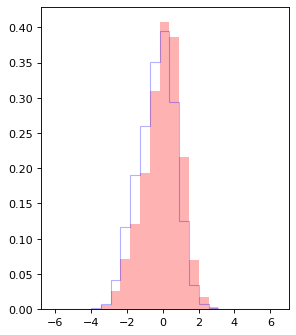

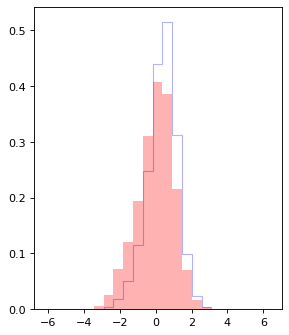

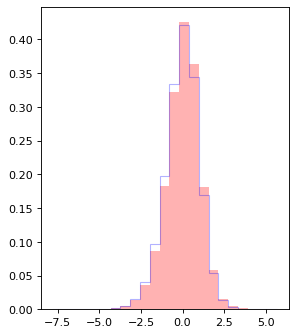

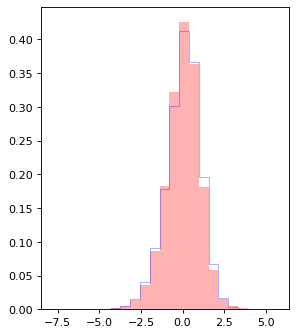

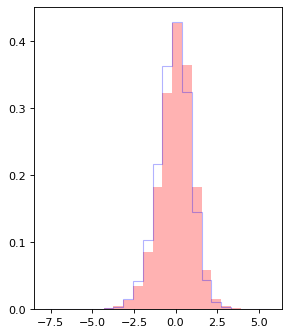

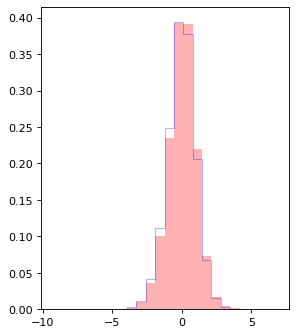

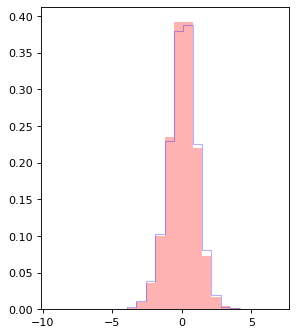

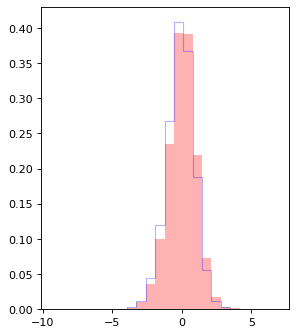

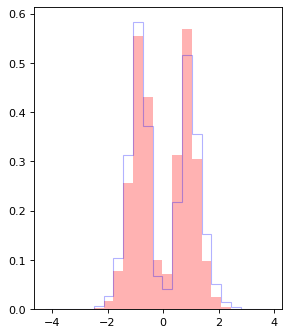

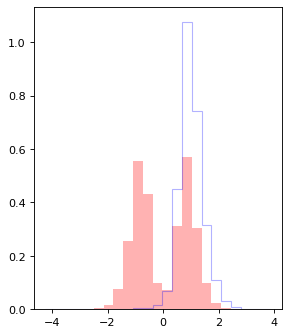

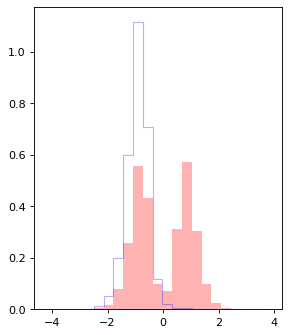

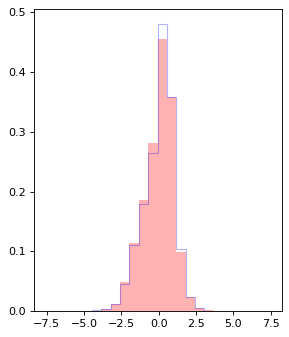

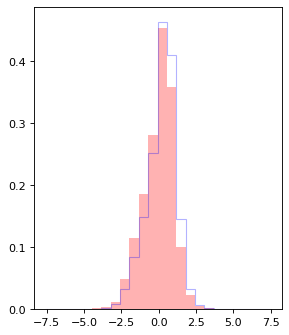

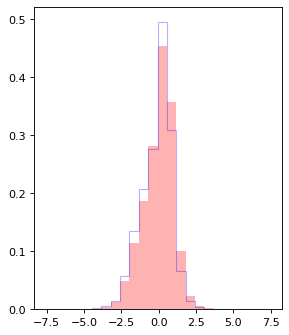

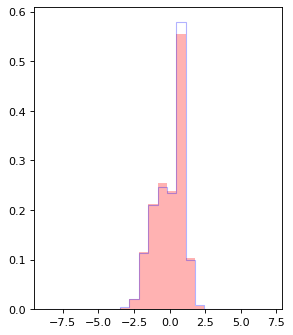

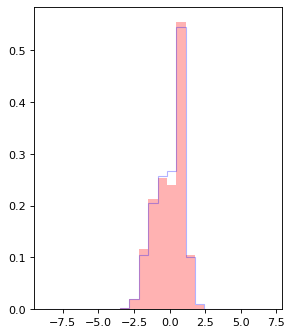

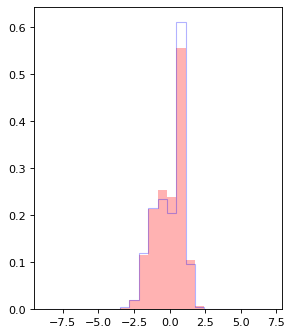

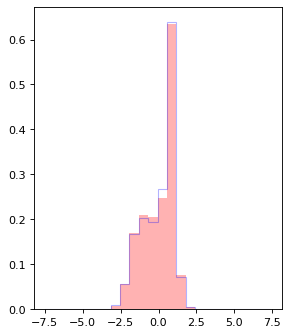

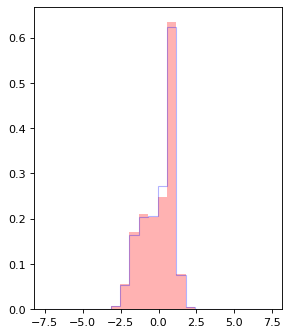

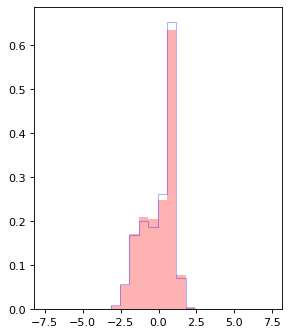

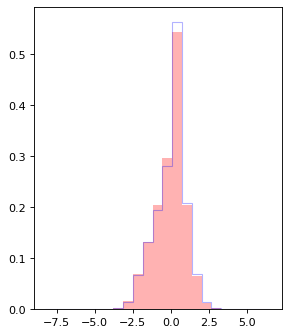

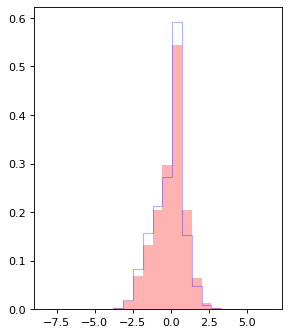

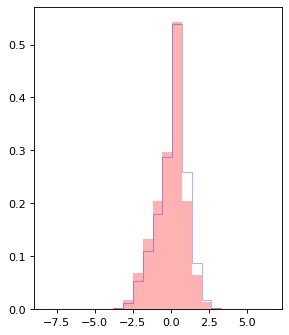

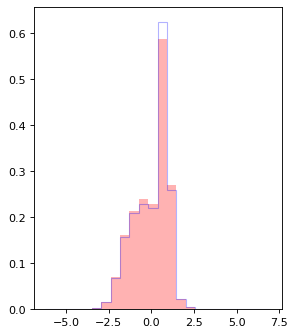

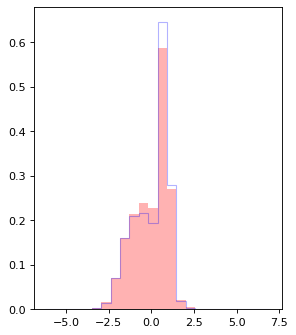

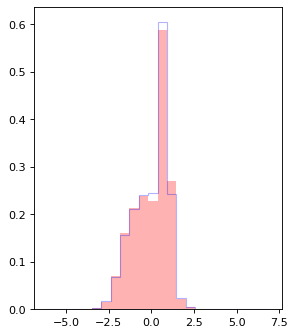

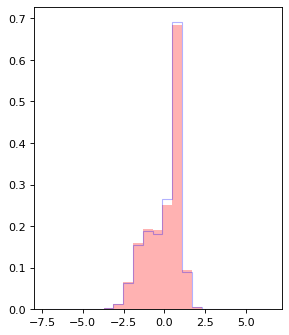

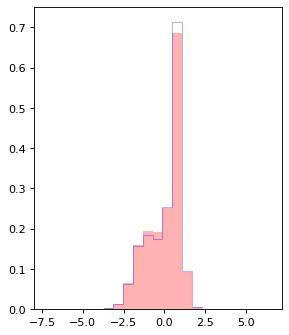

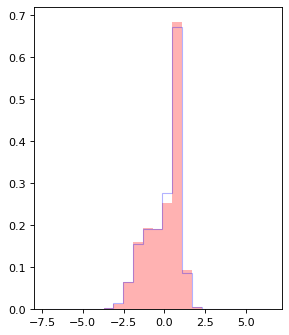

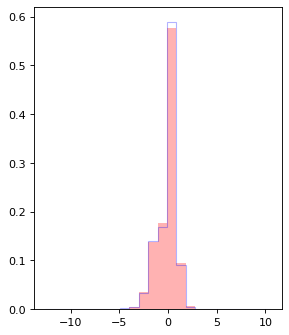

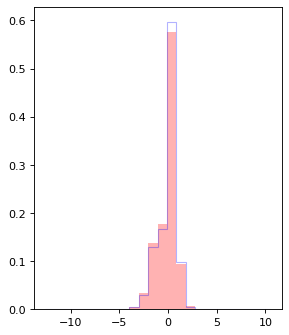

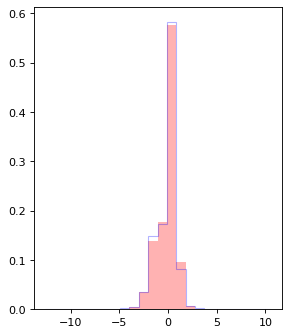

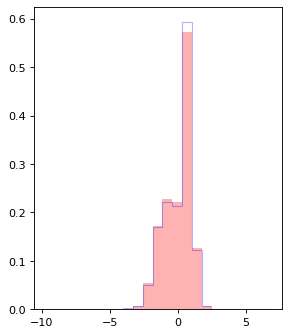

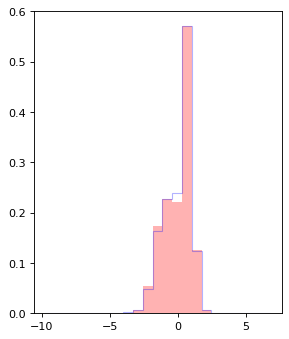

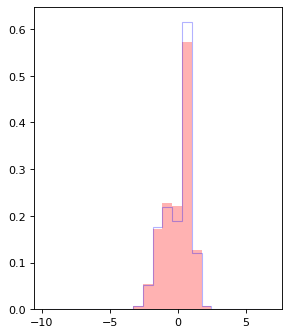

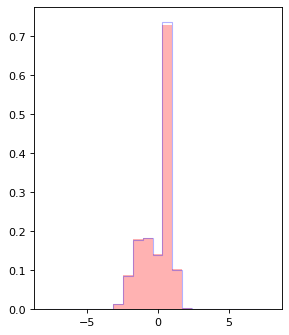

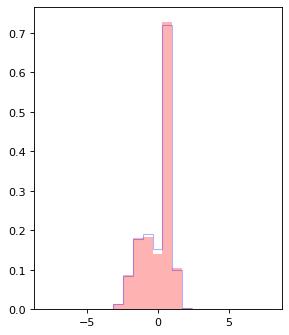

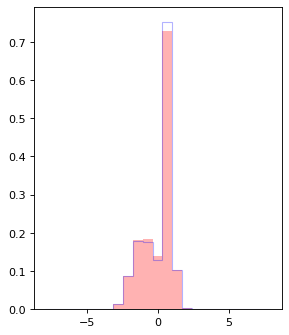

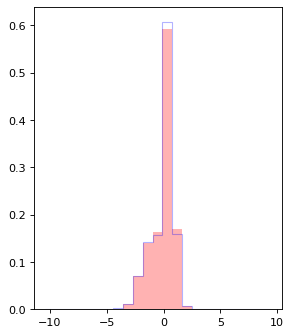

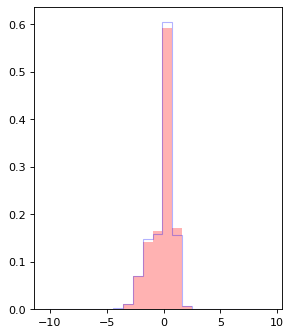

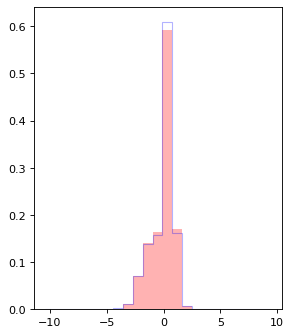

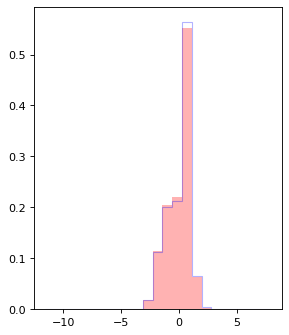

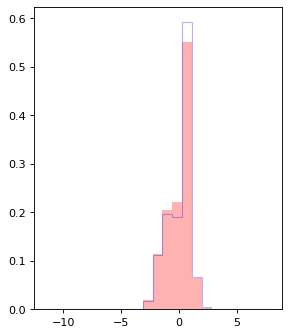

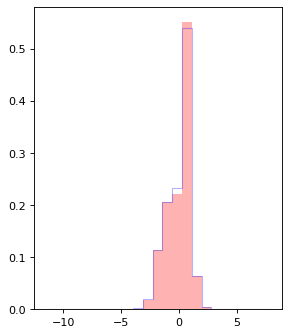

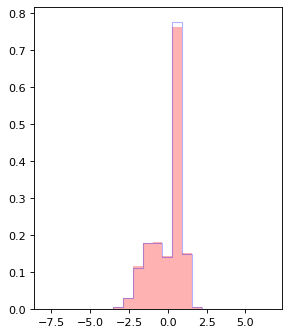

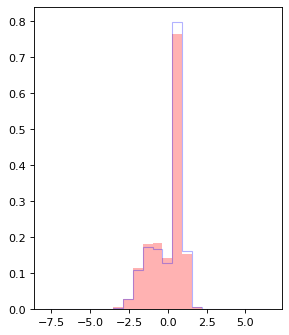

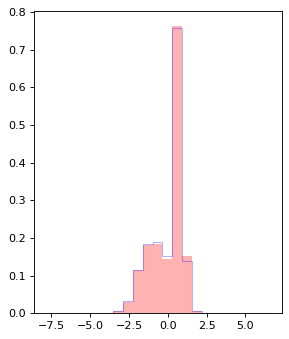

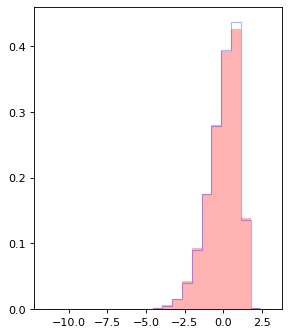

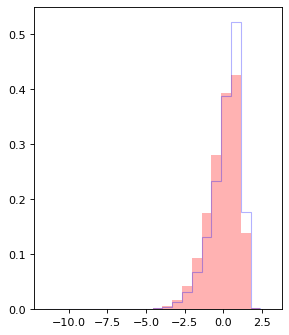

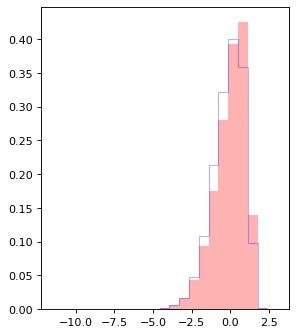

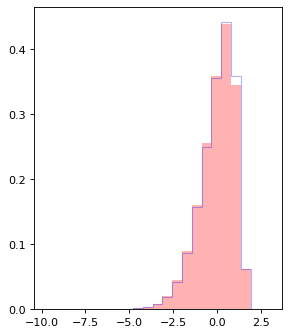

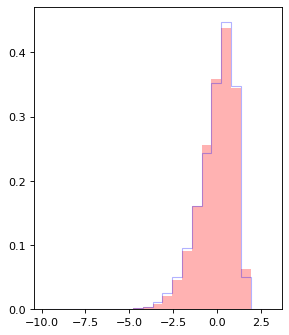

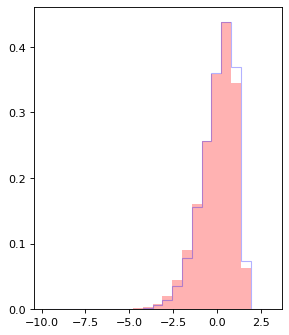

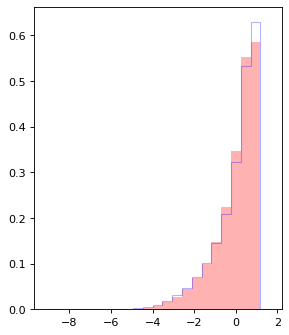

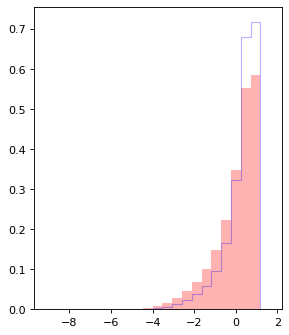

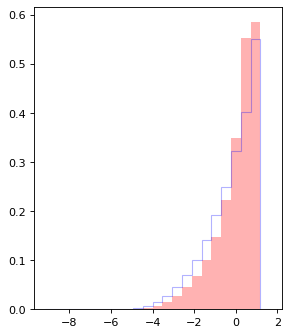

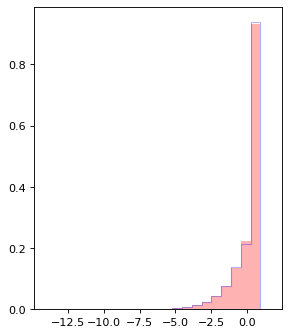

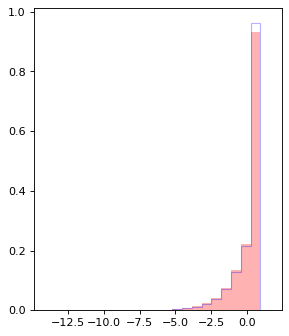

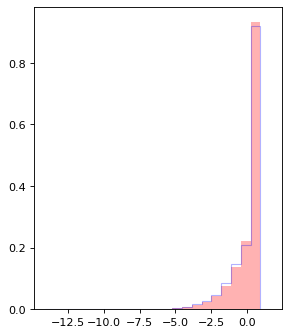

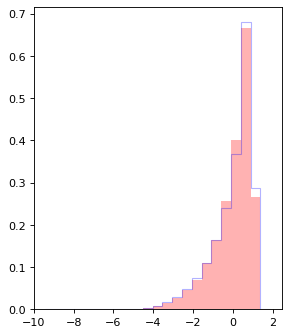

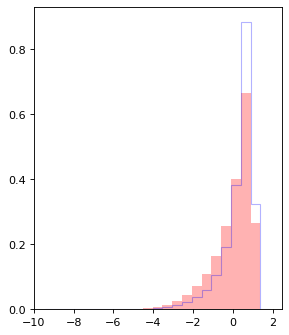

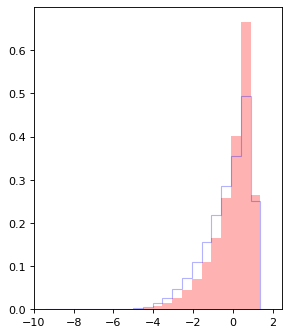

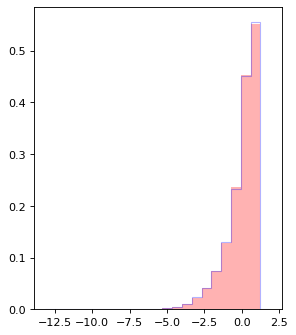

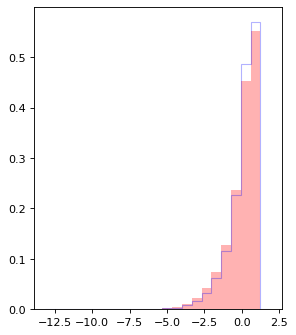

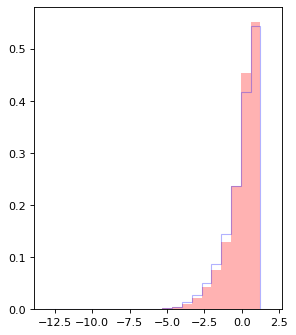

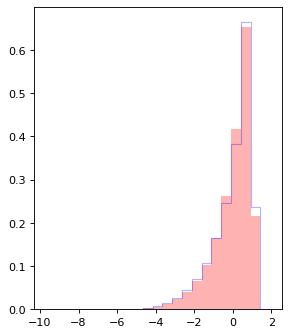

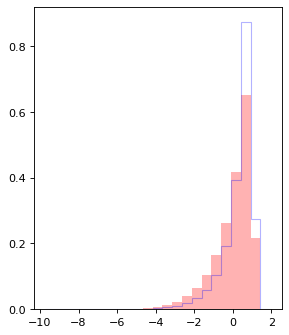

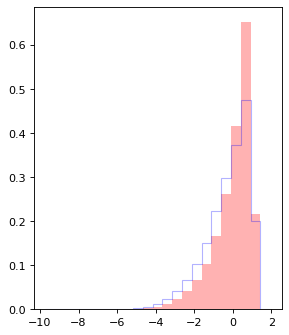

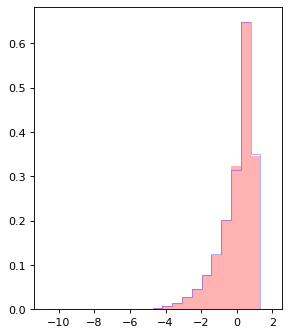

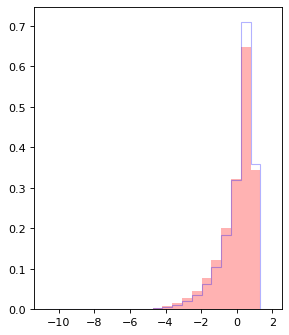

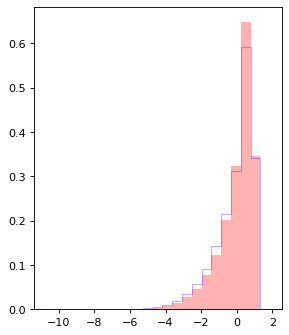

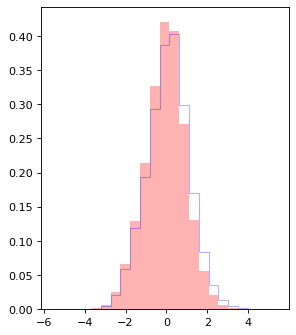

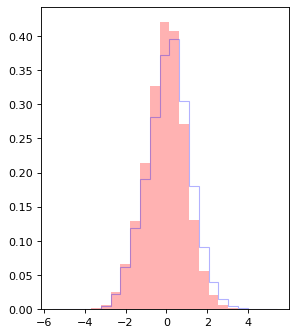

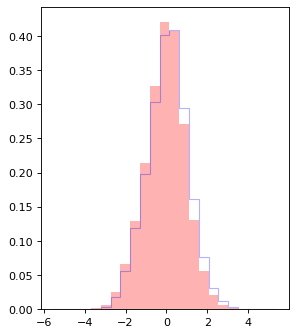

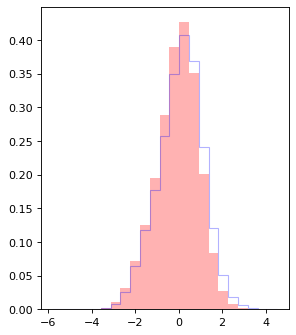

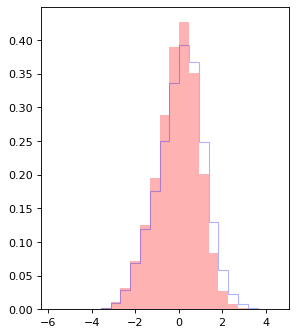

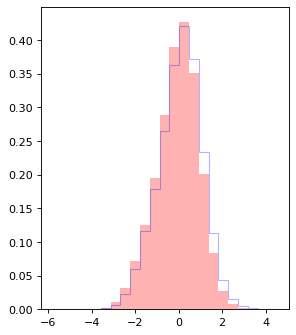

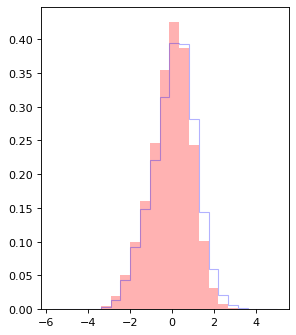

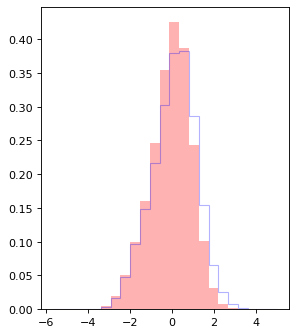

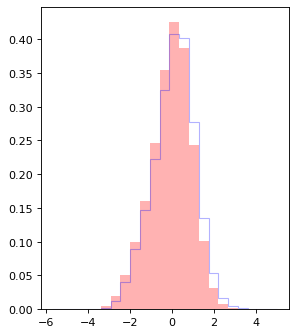

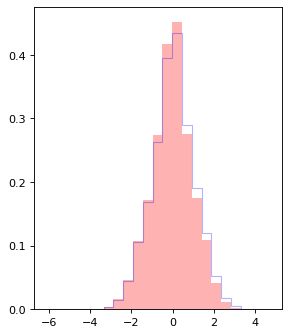

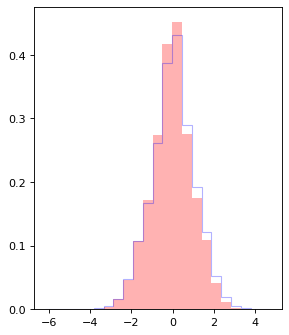

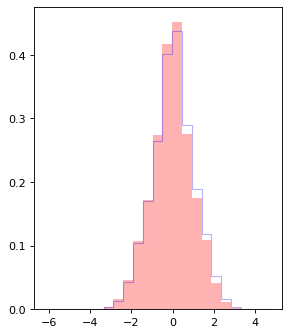

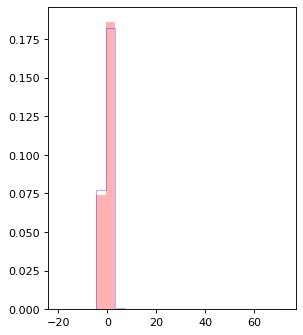

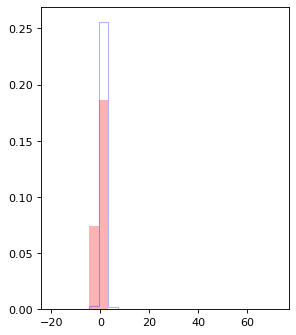

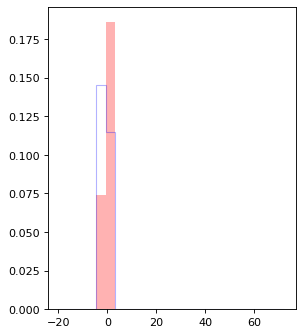

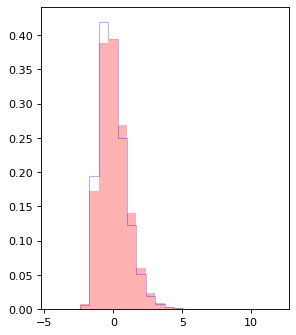

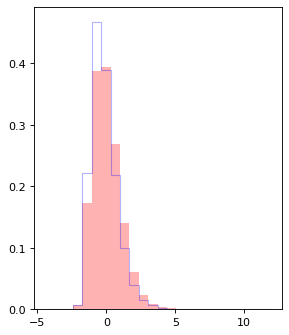

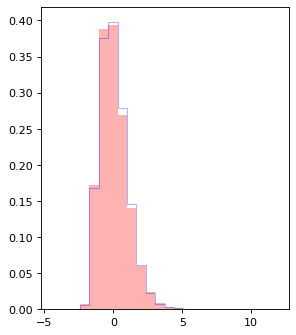

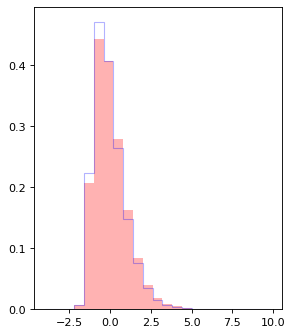

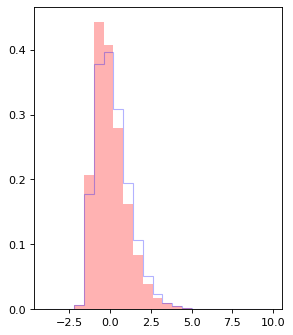

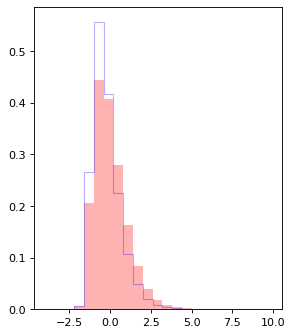

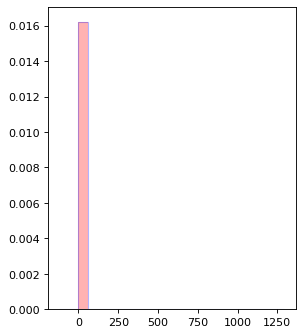

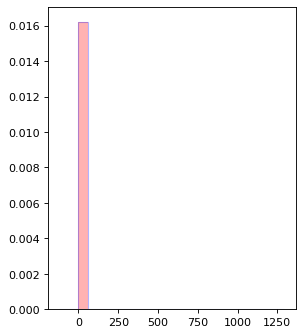

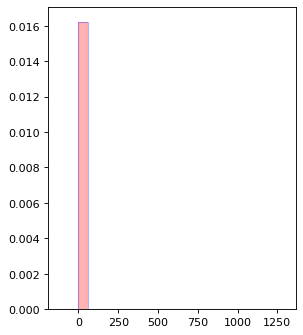

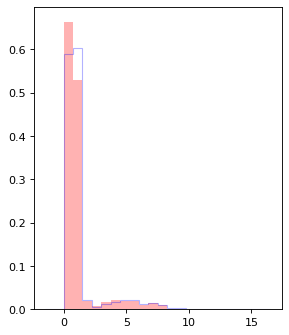

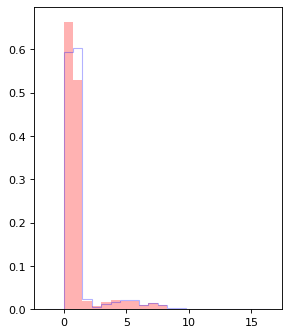

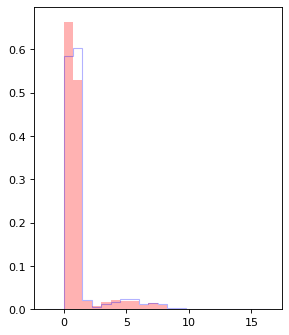

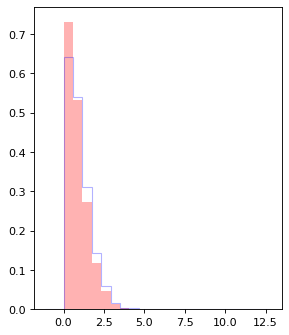

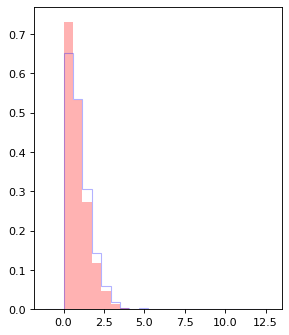

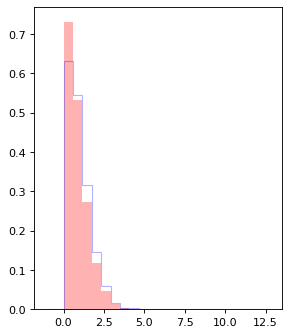

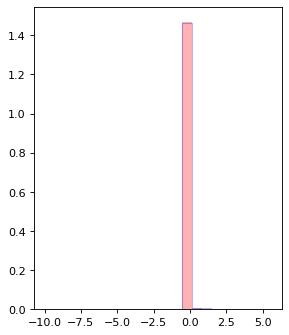

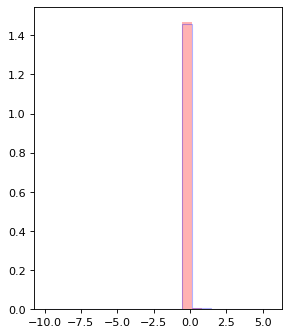

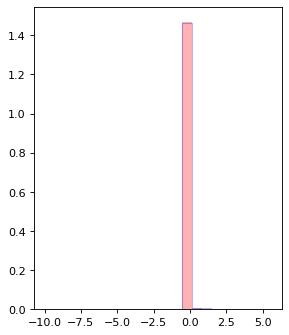

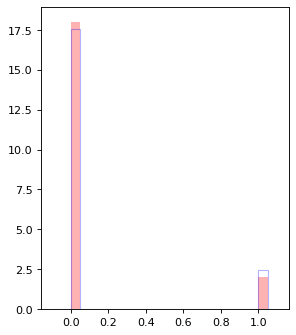

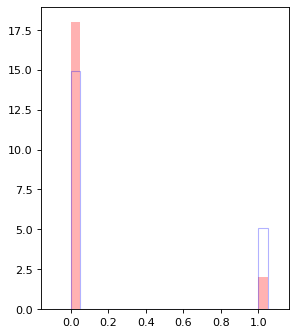

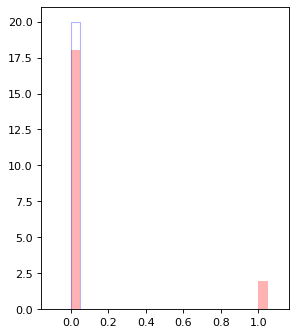

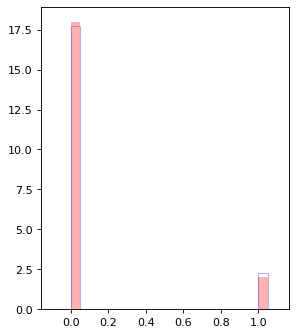

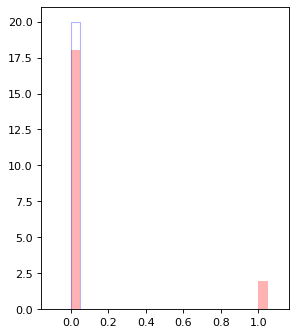

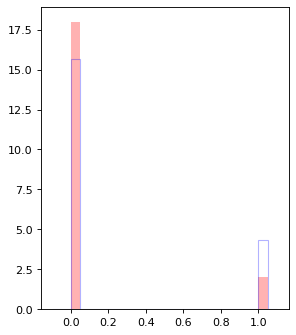

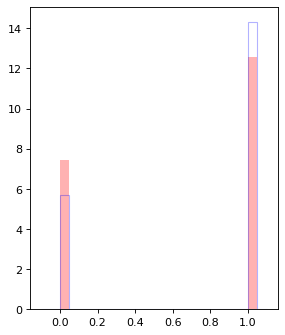

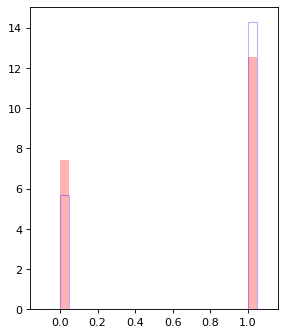

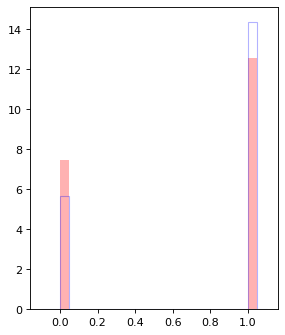

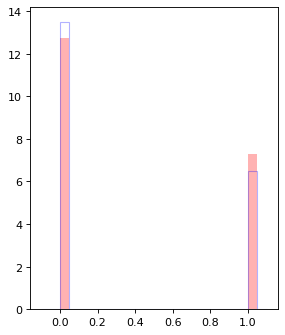

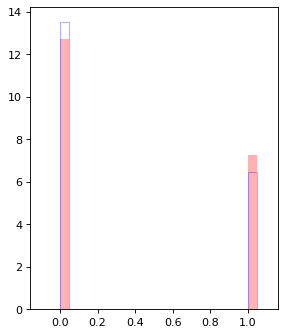

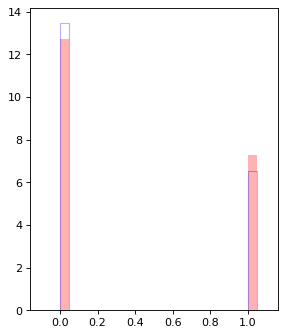

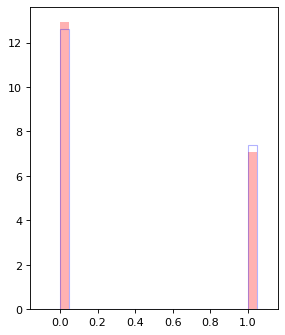

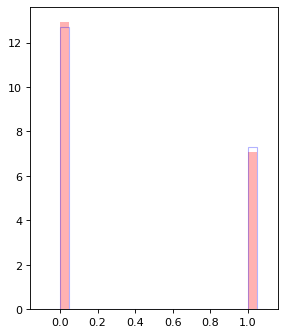

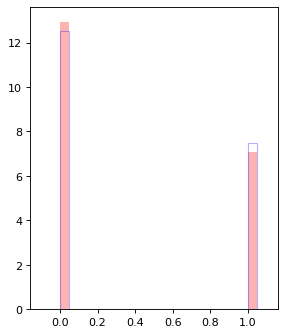

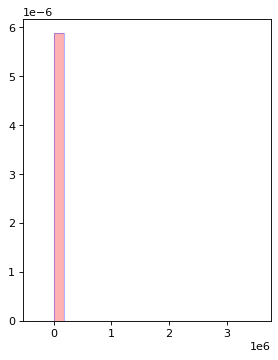

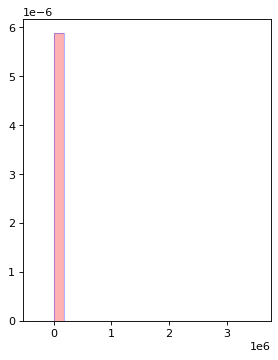

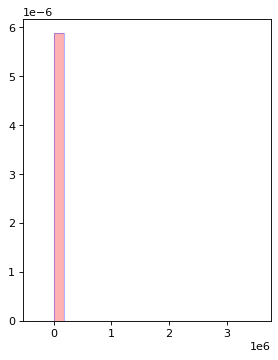

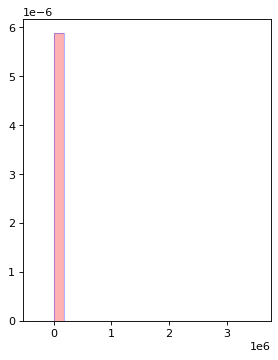

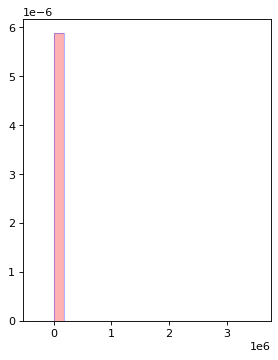

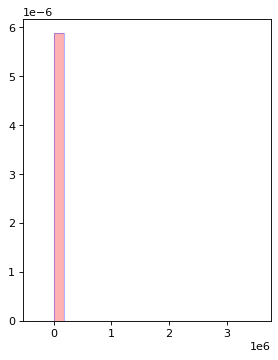

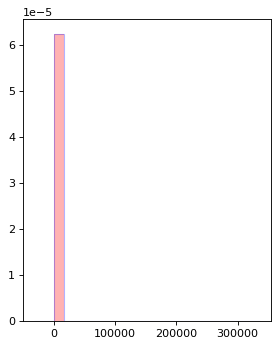

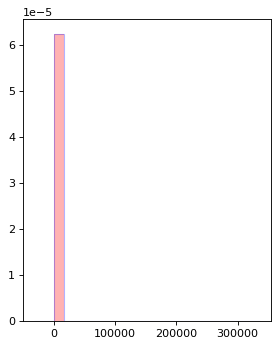

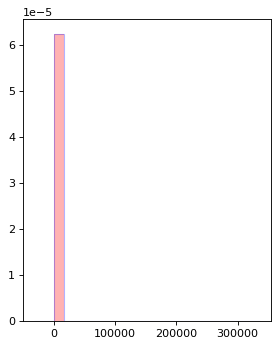

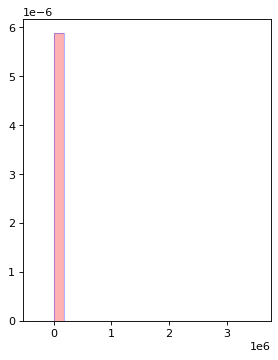

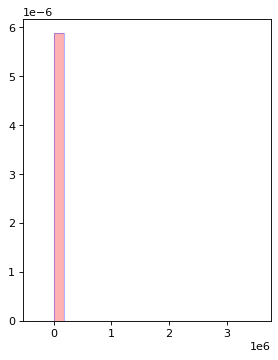

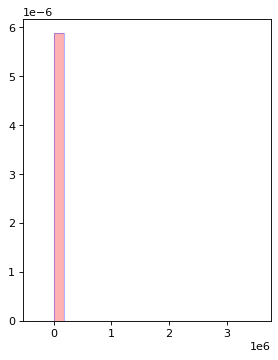

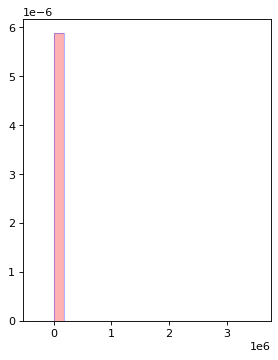

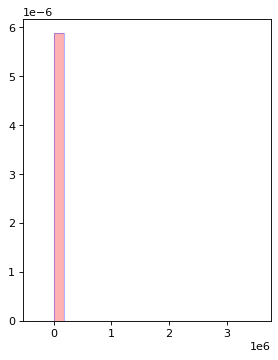

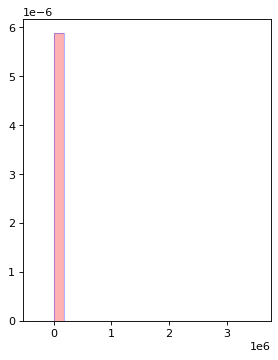

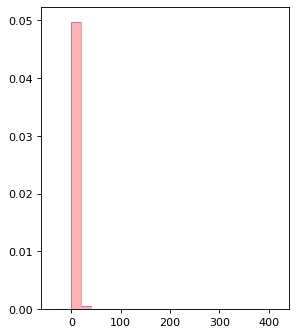

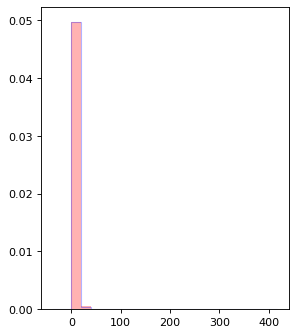

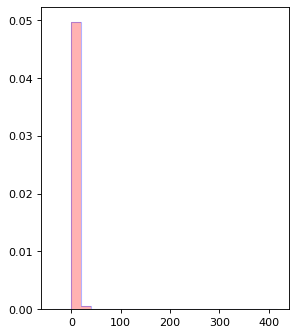

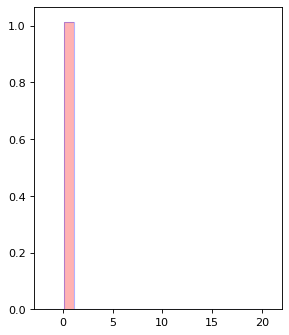

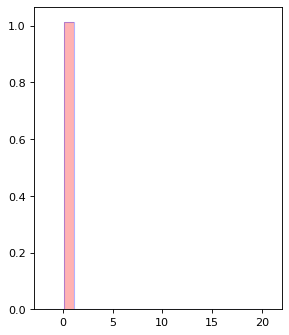

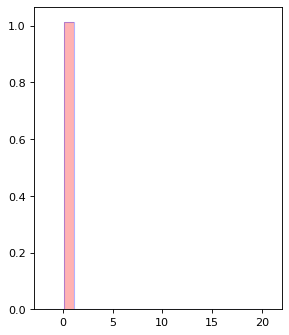

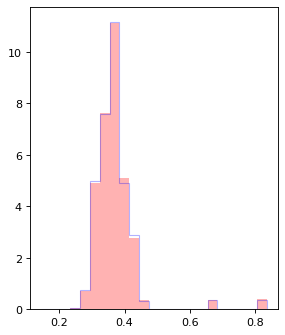

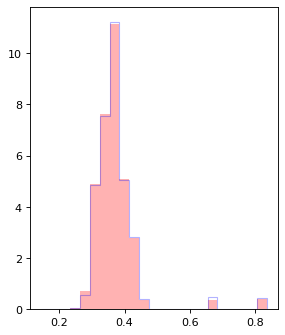

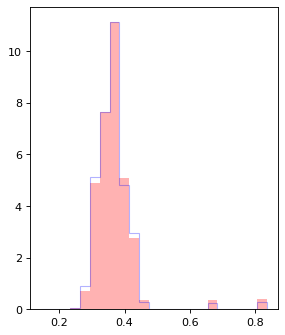

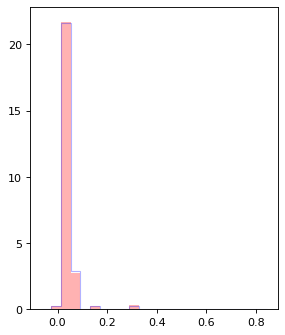

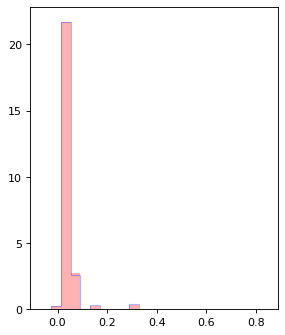

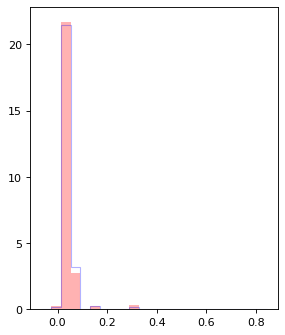

In [71]:
def DrawDistZero( ser_ft, ser_lb ):

    bin_num = 20.
    min_data = min(ser_ft[ser_lb==0])
    max_data = max(ser_ft[ser_lb==0])
    binwidth = (max_data-min_data)/bin_num
    bin_list = np.arange(min_data- 2* binwidth, max_data + 2* binwidth, binwidth)

    ft_name = str(ser_ft.name)
    fig = plt.figure(figsize=(4,5), dpi=80)
    plt.hist(ser_ft[ser_lb==0], color='red', cumulative=False, 
            alpha=0.3, histtype='stepfilled', density=True,
            bins=bin_list)
    plt.hist(ser_ft[(ser_lb==1) | (ser_lb==2)], color='blue', cumulative=False, 
            alpha=0.3,histtype='step', density=True,
            bins=bin_list)
    fig.savefig("Fig/0_12/" + ft_name + "_0_12_label.png")

    fig = plt.figure(figsize=(4,5), dpi=80)
    plt.hist(ser_ft[ser_lb==0], color='red', cumulative=False, 
            alpha=0.3, histtype='stepfilled', density=True,
            bins=bin_list)
    plt.hist(ser_ft[(ser_lb==1)], color='blue', cumulative=False, 
            alpha=0.3,histtype='step', density=True,
            bins=bin_list)
    fig.savefig("Fig/0_1/" + ft_name + "_0_1_label.png")

    fig = plt.figure(figsize=(4,5), dpi=80)
    plt.hist(ser_ft[ser_lb==0], color='red', cumulative=False, 
            alpha=0.3, histtype='stepfilled', density=True,
            bins=bin_list)
    plt.hist(ser_ft[(ser_lb==2)], color='blue', cumulative=False, 
            alpha=0.3,histtype='step', density=True,
            bins=bin_list)
    fig.savefig("Fig/0_2/" + ft_name + "_0_2_label.png")
    
#for ft in train_df.columns:
#   DrawDistZero( train_df[ft], train_lb_df.iloc[:,0] )